In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('measures_clean.csv')
df['record_id'].nunique()

123

In [33]:
df.columns

Index(['record_id', 'redcap_event_name', 'total_invites',
       'redcap_survey_identifier', 'partstatus', 'new_current',
       'mini_timestamp', 'mini_suicide_sum', 'mini_suicide_dx',
       'mini_suicide_dx_2', 'suicide_notes', 'suicide_protective',
       'phq9_question_9_only_timestamp', 'phq9_q9_only',
       'phq9_question_9_only_complete',
       'columbia_suicide_questionnaire_timestamp', 'csrs_q1', 'csrs_q2',
       'csrs_q3', 'csrs_q4', 'csrs_q5', 'csrs_q6', 'csrs_q7', 'csrc_total',
       'columbia_risk_score', 'columbia_suicide_questionnaire_complete',
       'gad7_timestamp', 'gad_feel_nervous', 'gad_stop_worry',
       'gad_worry_too_much', 'gad_relaxing', 'gad_restless', 'gad_irritable',
       'gad_afraid', 'gad_difficult', 'gad_total_score', 'gad7_complete',
       'isi_timestamp', 'difficulty_falling_asleep',
       'difficulty_staying_asleep', 'problem_waking_up_early',
       'how_satisfied_dissatisfied', 'how_noticeable', 'how_worried',
       'current_interferenc

In [34]:
def expand_condition(df):
    df['random_group'] = df.loc[df['redcap_event_name']=='baseline','random_group'].values[0]
    return df

In [35]:
df = df.groupby('record_id',group_keys=False).apply(expand_condition)
df

,record_id,redcap_event_name,total_invites,redcap_survey_identifier,partstatus,new_current,mini_timestamp,mini_suicide_sum,mini_suicide_dx,mini_suicide_dx_2,...,phq8_3,phq8_4,phq8_5,phq8_6,phq8_7,phq8_8,phq8_total_score,patient_health_questionnaire_complete,randomization_timestamp,random_group
0,CF017AUD,baseline,123,NaN,2.0,NaN,2021-11-19 10:12:04,0.0,0.0,1.0,...,3.0,1.0,2.0,0.0,2.0,3.0,12.0,2.0,NaN,1.0
1,CF017AUD,week_3,121,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,CF017AUD,week_6,118,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0
3,CF017AUD,week_10,110,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0
4,CF017AUD,week_14,106,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,MM321AUD,week_3,121,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
675,MM321AUD,week_6,118,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,1.0,2.0,1.0,3.0,3.0,2.0,15.0,2.0,NaN,0.0
676,MM321AUD,week_10,110,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0
677,MM321AUD,week_12,28,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,8.0,2.0,NaN,0.0


In [36]:
df['random_group'].value_counts()

0.0    357
1.0    322
Name: random_group, dtype: int64

In [37]:
df_isi_gad = df.loc[(df['gad7_complete']==2) | (df['isi_complete']==2), ['record_id','redcap_event_name','random_group','gad_total_score','isi_total_score']]
df_isi_gad

,record_id,redcap_event_name,random_group,gad_total_score,isi_total_score
0,CF017AUD,baseline,1.0,11.0,18.0
1,CF017AUD,week_3,1.0,11.0,18.0
2,CF017AUD,week_6,1.0,11.0,14.0
3,CF017AUD,week_10,1.0,12.0,16.0
4,CF017AUD,week_14,1.0,10.0,7.0
...,...,...,...,...,...
670,MM318AUD,week_10,0.0,6.0,12.0
672,MM318AUD,week_14,0.0,7.0,15.0
673,MM321AUD,baseline,0.0,21.0,26.0
674,MM321AUD,week_3,0.0,14.0,11.0


In [41]:
df_isi_gad.to_csv('df_isi_gad.csv')

In [38]:
isi_gad_scores = df_isi_gad.groupby('redcap_event_name').agg({'gad_total_score':['mean','std'],'isi_total_score':['mean','std']}).reindex(['baseline','week_3','week_6','week_10','week_14'])
isi_gad_scores.round(decimals=2)

gad_total_score       isi_total_score      
                             mean   std            mean   std
redcap_event_name                                            
baseline                     6.97  5.22           16.92  5.38
week_3                       7.09  4.40           13.69  4.62
week_6                       7.59  4.85           12.33  5.36
week_10                      7.01  5.18           11.75  5.60
week_14                      6.57  4.76           10.34  5.55

In [39]:
isi_by_condition = df_isi_gad.groupby(['random_group','redcap_event_name']).agg({'isi_total_score':['mean','std']}).reindex(['baseline','week_3','week_6','week_10','week_14'], level=1)
isi_by_condition.round(decimals=2)

isi_total_score      
                                          mean   std
random_group redcap_event_name                      
0.0          baseline                    17.23  4.81
             week_3                      13.62  4.67
             week_6                      13.20  5.49
             week_10                     12.35  5.98
             week_14                     10.96  5.95
1.0          baseline                    16.58  5.96
             week_3                      13.78  4.60
             week_6                      11.42  5.11
             week_10                     11.13  5.17
             week_14                      9.71  5.09

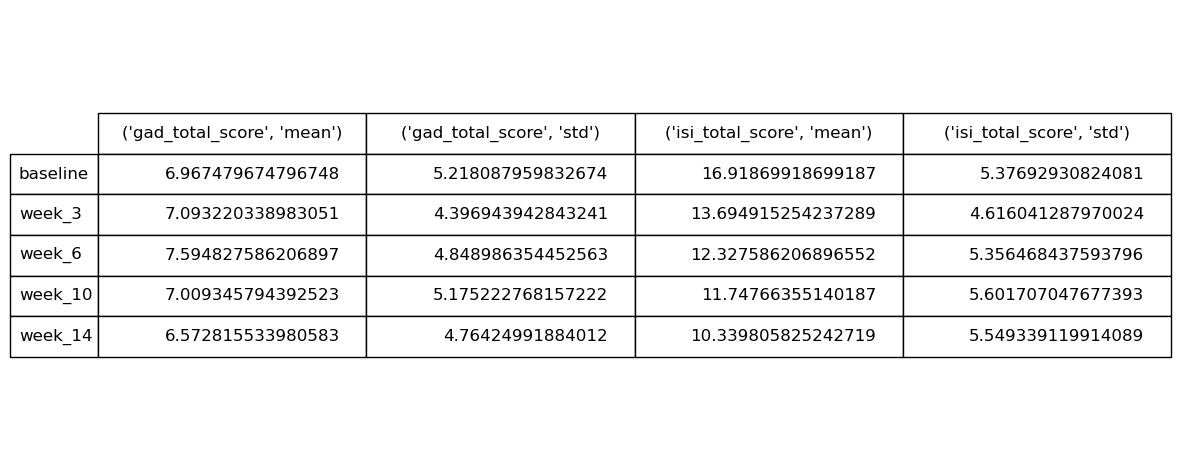

In [40]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=isi_gad_scores.values, rowLabels=isi_gad_scores.index, colLabels=isi_gad_scores.columns, loc='center')

#display table
fig.tight_layout()
table.set_fontsize(14)
table.scale(2,2)
plt.show()